In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = '/content/drive/My Drive/ML/Decision_Tree/data.csv'

In [12]:
# Load the data
data = pd.read_csv(file_path)
data.head()
data.head(data.shape[0])

,Age,Income,Shopping Frequency,Promotional Discount
0,20,Low,Frequent,Yes
1,35,Medium,Rare,No
2,28,Low,Occasional,Yes
3,42,High,Rare,No
4,25,Medium,Frequent,Yes
5,30,Medium,Occasional,No
6,22,Low,Frequent,Yes
7,45,High,Rare,No
8,29,Medium,Frequent,Yes
9,50,High,Occasional,No


In [35]:
# Separate features (X) and target (y)
X = data.drop('Promotional Discount', axis=1)
y = data['Promotional Discount']

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode categorical features in X
for col in X.columns:
    if X[col].dtype == 'object':  # Check if the column is categorical
        X[col] = encoder.fit_transform(X[col])

# Encode the target column as well
y = encoder.fit_transform(y)

In [38]:
print("\nEncoded Features:")
print(X)
print("\nEncoded Target (Promotional Discount):")
print(y)


Encoded Features:
   Age  Income  Shopping Frequency
0   20       1                   0
1   35       2                   2
2   28       1                   1
3   42       0                   2
4   25       2                   0
5   30       2                   1
6   22       1                   0
7   45       0                   2
8   29       2                   0
9   50       0                   1

Encoded Target (Promotional Discount):
[1 0 1 0 1 0 1 0 1 0]


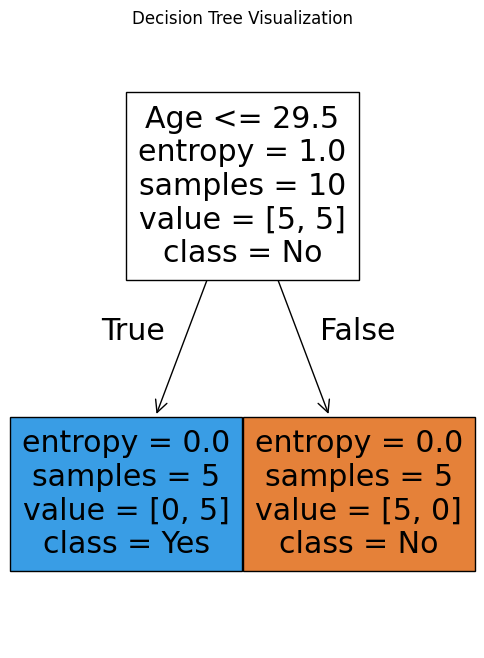

In [46]:
# Train the Decision Tree Classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(6, 8))  # Adjust figure size
tree.plot_tree(clf, feature_names=X.columns, class_names=encoder.classes_, filled=True, ax=ax)
plt.title("Decision Tree Visualization")
plt.show()


In [61]:
# Make predictions
# Sample input: Age=30, Income='Medium', Shopping Frequency='Frequent', Promotional Discount=True
sample_input = [25, 1, 2]  # Encode 'Medium' (1), 'Frequent' (0), and True (1)

# Predict using the sample input
predictions = clf.predict([sample_input])

# Decode the prediction to 'Yes' or 'No'
prediction_decoded = encoder.inverse_transform(predictions)

print("Prediction (Promotional Discount):", prediction_decoded[0])

Prediction (Promotional Discount): Yes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
